# COVID Datahub - Exploratory Data Analysis

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing data

Using data from the COVID19 Datahub, administrative level 1 in `.csv` format available at https://storage.covid19datahub.io/data-1.csv

In [2]:
data1 = pd.read_csv("./data/data-1.csv")
print(data1.shape)
print(data1.columns)
data1.head()

(57721, 35)
Index(['id', 'date', 'tests', 'confirmed', 'recovered', 'deaths', 'hosp',
       'vent', 'icu', 'population', 'school_closing', 'workplace_closing',
       'cancel_events', 'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'iso_alpha_3',
       'iso_alpha_2', 'iso_numeric', 'currency', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'latitude', 'longitude', 'key',
       'key_apple_mobility', 'key_google_mobility'],
      dtype='object')


,id,date,tests,confirmed,recovered,deaths,hosp,vent,icu,population,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
0,AFG,2020-01-01,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
1,AFG,2020-01-02,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
2,AFG,2020-01-03,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
3,AFG,2020-01-04,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
4,AFG,2020-01-05,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF


Go to https://covid19datahub.io/articles/doc/data.html to get a description of what each variable in the dataset represents

In [3]:
# Converting dates to datetime format
data1['date'] = pd.to_datetime(data1['date'], format='%Y-%m-%d')

## Example exploratory code

### Visualizing data for a specific country

Using Canada as an example

In [4]:
selected_country = "Canada"
data_country = data1[data1.administrative_area_level_1 == selected_country]
print(data_country.shape)
data_country.head()

(293, 35)


,id,date,tests,confirmed,recovered,deaths,hosp,vent,icu,population,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
9376,CAN,2020-01-01,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9377,CAN,2020-01-02,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9378,CAN,2020-01-03,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9379,CAN,2020-01-04,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9380,CAN,2020-01-05,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA


Checking initial and final date of observations for a country

In [5]:
print(data_country.date.max() - data_country.date.min())
print(data_country.date.min())
print(data_country.date.max())

292 days 00:00:00
2020-01-01 00:00:00
2020-10-19 00:00:00


Visualizing how `workplace_closing` policy has changed thoughout the pandemic, where:
- 0: No measures 
- 1: Recommend closing (or work from home) 
- 2: require closing for some sectors or categories of workers 
- 3: require closing (or work from home) all-but-essential workplaces (eg grocery stores, doctors).

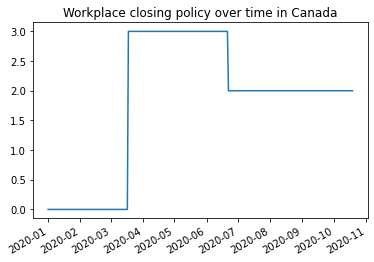

In [6]:
fig, ax = plt.subplots()
ax.plot(data_country['date'], data_country['workplace_closing'])
ax.set_title('Workplace closing policy over time in ' + selected_country)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

Visualizing the number of confirmed cases and deaths over time

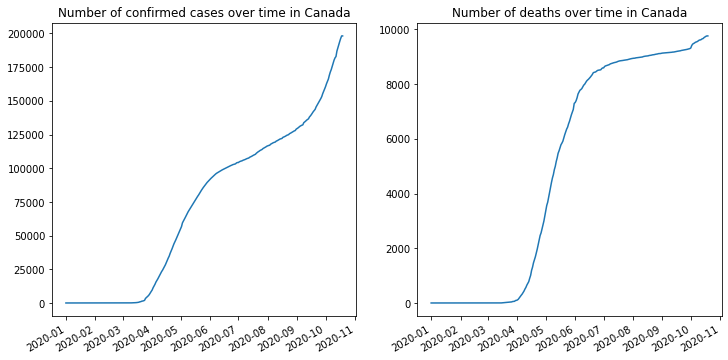

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(data_country['date'], data_country['confirmed'])
ax1.set_title('Number of confirmed cases over time in ' + selected_country)
ax2.plot(data_country['date'], data_country['deaths'])
ax2.set_title('Number of deaths over time in ' + selected_country)
fig.autofmt_xdate()

Calculating number of daily NEW cases and deaths

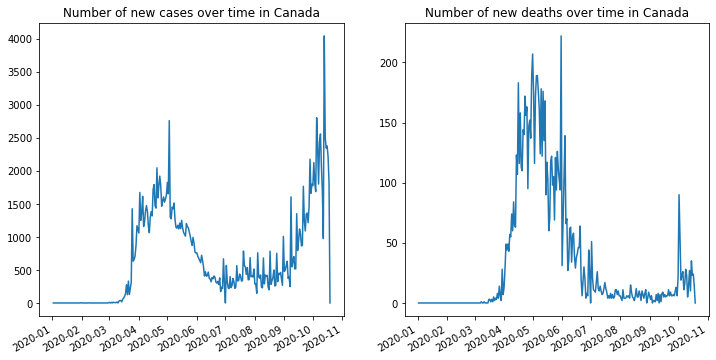

In [9]:
data_country.loc[:,'new_cases'] = data_country.loc[:, 'confirmed'].diff()
data_country.loc[:,'new_deaths'] = data_country['deaths'].diff()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(data_country['date'], data_country['new_cases'])
ax1.set_title('Number of new cases over time in ' + selected_country)
ax2.plot(data_country['date'], data_country['new_deaths'])
ax2.set_title('Number of new deaths over time in ' + selected_country)
fig.autofmt_xdate()

Visualizing school closing policy in the selected country

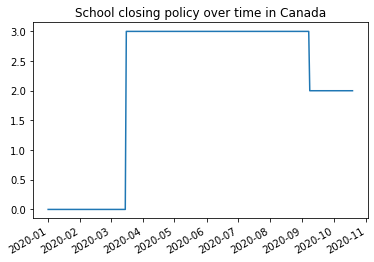

In [10]:
fig, ax = plt.subplots()
ax.plot(data_country['date'], data_country['school_closing'])
ax.set_title('School closing policy over time in ' + selected_country)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

Visualizing the effects of school closing policies on the number of confirmed cases

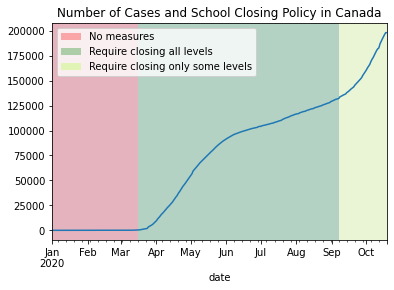

In [14]:
from matplotlib.patches import Patch
ax = data_country.plot(x='date', y='confirmed', title="Number of Cases and School Closing Policy in Canada")
ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),
              data_country['school_closing'].values[np.newaxis],
              cmap='RdYlGn', alpha=0.3)

legend_elements = [Patch(facecolor='red', edgecolor=None, alpha=0.3, label='No measures'),
                  Patch(facecolor='green', edgecolor=None, alpha=0.3, label='Require closing all levels'),
                  Patch(facecolor='greenyellow', edgecolor=None, alpha=0.3, label='Require closing only some levels')]
ax.legend(handles=legend_elements, loc='upper left');

## Comparing two countries

In [15]:
selected_countries = ["Spain", "France"]

Visualizing confirmed cases and deaths over time:

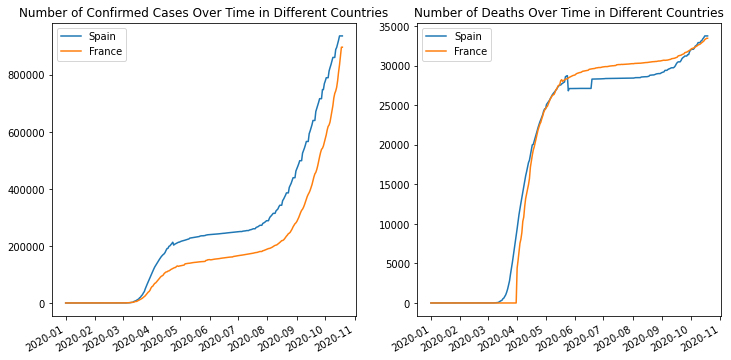

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for country in selected_countries:
    data_country_it = data1[data1.administrative_area_level_1 == country]
    ax1.plot(data_country_it['date'], data_country_it['confirmed'], label=country)
    ax1.set_title('Number of Confirmed Cases Over Time in Different Countries')
    ax2.plot(data_country_it['date'], data_country_it['deaths'], label=country)
    ax2.set_title('Number of Deaths Over Time in Different Countries')
fig.autofmt_xdate()
ax1.legend()
ax2.legend()

Visualizing new cases and deaths over time:

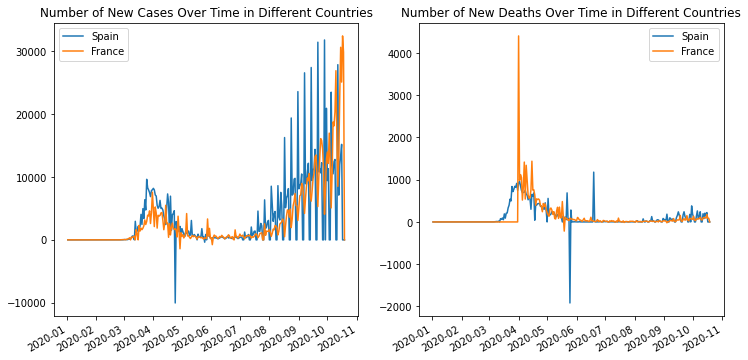

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for country in selected_countries:
    data_country_it = data1[data1.administrative_area_level_1 == country]
    data_country_it.loc[:,'new_cases'] = data_country_it['confirmed'].diff()
    data_country_it.loc[:,'new_deaths'] = data_country_it['deaths'].diff()
    ax1.plot(data_country_it['date'], data_country_it['new_cases'], label=country)
    ax1.set_title('Number of New Cases Over Time in Different Countries')
    ax2.plot(data_country_it['date'], data_country_it['new_deaths'], label=country)
    ax2.set_title('Number of New Deaths Over Time in Different Countries')
fig.autofmt_xdate()
ax1.legend()
ax2.legend()

## Importing data for a different administrative level

Using data from the COVID19 Datahub, administrative level 3 in `.csv` format available at https://storage.covid19datahub.io/data-3.csv

In [18]:
data3 = pd.read_csv("./data/data-3.csv")
print(data3.shape)
print(data3.columns)
data3.head()

(1483482, 37)
Index(['id', 'date', 'tests', 'confirmed', 'recovered', 'deaths', 'hosp',
       'vent', 'icu', 'population', 'school_closing', 'workplace_closing',
       'cancel_events', 'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'iso_alpha_3',
       'iso_alpha_2', 'iso_numeric', 'currency', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'latitude', 'longitude', 'key',
       'key_numeric', 'key_google_mobility', 'key_apple_mobility',
       'key_alpha_2'],
      dtype='object')


,id,date,tests,confirmed,recovered,deaths,hosp,vent,icu,population,...,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_numeric,key_google_mobility,key_apple_mobility,key_alpha_2
0,0007cb93,2020-01-21,0,0,0,0,0,0,0,5257.0,...,United States,Georgia,Schley,32.265402,-84.312589,NaN,13249.0,"Georgia, Schley County",NaN,NaN
1,0007cb93,2020-01-22,0,0,0,0,0,0,0,5257.0,...,United States,Georgia,Schley,32.265402,-84.312589,NaN,13249.0,"Georgia, Schley County",NaN,NaN
2,0007cb93,2020-01-23,0,0,0,0,0,0,0,5257.0,...,United States,Georgia,Schley,32.265402,-84.312589,NaN,13249.0,"Georgia, Schley County",NaN,NaN
3,0007cb93,2020-01-24,0,0,0,0,0,0,0,5257.0,...,United States,Georgia,Schley,32.265402,-84.312589,NaN,13249.0,"Georgia, Schley County",NaN,NaN
4,0007cb93,2020-01-25,0,0,0,0,0,0,0,5257.0,...,United States,Georgia,Schley,32.265402,-84.312589,NaN,13249.0,"Georgia, Schley County",NaN,NaN


In [19]:
# Converting dates to datetime format
data3['date'] = pd.to_datetime(data3['date'], format='%Y-%m-%d')

Viewing available administrative level 1

In [20]:
data3.administrative_area_level_1.unique()

array(['United States', 'Colombia', 'United Kingdom', 'Poland', 'Germany',
       'France', 'Italy', 'Czech Republic', 'Chile', 'Puerto Rico',
       'Spain'], dtype=object)

Viewing example administrative level 3 for a specific country

In [22]:
data3[data3.administrative_area_level_1 == "France"]['administrative_area_level_3'].unique()

array(['Gard', 'Rhône', 'Hérault', 'Orne', 'Vienne', 'Hautes-Pyrénées',
       'Tarn-et-Garonne', 'Isère', 'Saône-et-Loire', 'Guyane', 'Paris',
       'Hauts-de-Seine', 'Eure-et-Loir', 'Deux-Sèvres', 'Dordogne',
       'Marne', 'Ardennes', 'Meuse', 'Alpes-de-Haute-Provence', 'Nord',
       'Aube', 'Calvados', 'Maine-et-Loire', 'Loir-et-Cher', 'Cher',
       'Loiret', 'Corse-du-Sud', 'Lozère', 'Cantal', 'Aude',
       'Loire-Atlantique', 'Corrèze', 'Landes', 'Meurthe-et-Moselle',
       'Ariège', 'Manche', 'Nièvre', 'Hautes-Alpes', 'Ain', 'Finistère',
       'Haute-Savoie', 'Seine-Saint-Denis', 'Martinique', 'Mayotte',
       'Haute-Saône', 'Doubs', 'Yvelines', "Côte-d'Or", 'Ille-et-Vilaine',
       'Haut-Rhin', 'Haute-Garonne', 'Jura', 'Pyrénées-Atlantiques',
       'Var', 'Oise', 'Haute-Vienne', 'Creuse', 'Eure', 'La Réunion',
       'Sarthe', "Val-d'Oise", 'Seine-Maritime', 'Essonne',
       'Pas-de-Calais', 'Vendée', 'Pyrénées-Orientales', 'Tarn',
       'Gironde', 'Yonne', 'Indre-e

### Visualizing data for a specific city

Using Paris as an example

In [23]:
selected_city = "Paris"
data_city = data3[data3.administrative_area_level_3 == selected_city]
print(data_city.shape)
data_city.head()

(273, 37)


,id,date,tests,confirmed,recovered,deaths,hosp,vent,icu,population,...,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_numeric,key_google_mobility,key_apple_mobility,key_alpha_2
117117,1568931f,2020-01-21,0,0,0,0,0,0,0,NaN,...,France,NaN,Paris,NaN,NaN,DEP-75,NaN,NaN,NaN,NaN
117118,1568931f,2020-01-22,0,0,0,0,0,0,0,NaN,...,France,NaN,Paris,NaN,NaN,DEP-75,NaN,NaN,NaN,NaN
117119,1568931f,2020-01-23,0,0,0,0,0,0,0,NaN,...,France,NaN,Paris,NaN,NaN,DEP-75,NaN,NaN,NaN,NaN
117120,1568931f,2020-01-24,0,0,0,0,0,0,0,NaN,...,France,NaN,Paris,NaN,NaN,DEP-75,NaN,NaN,NaN,NaN
117121,1568931f,2020-01-25,0,0,0,0,0,0,0,NaN,...,France,NaN,Paris,NaN,NaN,DEP-75,NaN,NaN,NaN,NaN


Checking initial and final date of observations for a country

In [24]:
print(data_city.date.max() - data_city.date.min())
print(data_city.date.min())
print(data_city.date.max())

272 days 00:00:00
2020-01-21 00:00:00
2020-10-19 00:00:00


Visualizing how `school_closing` policy has changed thoughout the pandemic, where:
- 0: No measures 
- 1: Recommend closing (or work from home) 
- 2: require closing for some sectors or categories of workers 
- 3: require closing (or work from home) all-but-essential workplaces (eg grocery stores, doctors).

Visualizing school closing policy

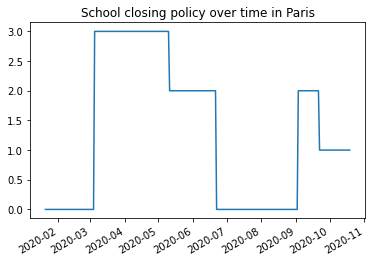

In [26]:
fig, ax = plt.subplots()
ax.plot(data_city['date'], data_city['school_closing'])
ax.set_title('School closing policy over time in ' + selected_city)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

Visualizing number of new cases and deaths

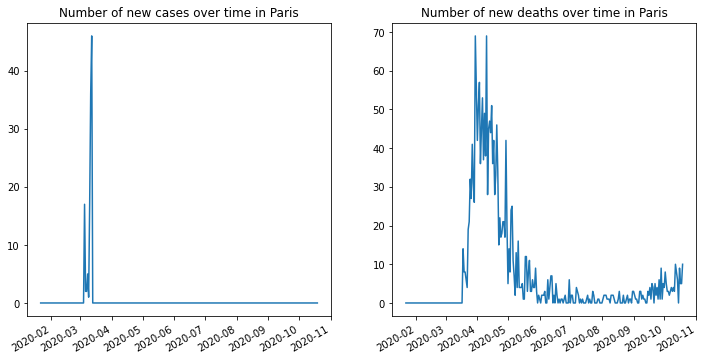

In [27]:
data_city.loc[:,'new_cases'] = data_city['confirmed'].diff()
data_city.loc[:,'new_deaths'] = data_city['deaths'].diff()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(data_city['date'], data_city['new_cases'])
ax1.set_title('Number of new cases over time in ' + selected_city)
ax2.plot(data_city['date'], data_city['new_deaths'])
ax2.set_title('Number of new deaths over time in ' + selected_city)
fig.autofmt_xdate()

# Validating Simulation Data

**Observations:**

> On smaller areas (administrative_area_level_3) the quality of the data does not seem to be very good. We have decided to use country-level (level 1) data instead to build a baseline case around.

> Simply getting the daily difference of the number of confirmed cases and deaths to get the number of daily new cases and deaths is noisy and even generates large negative numbers. We're using a moving average instead.

### Back to Canada's Data

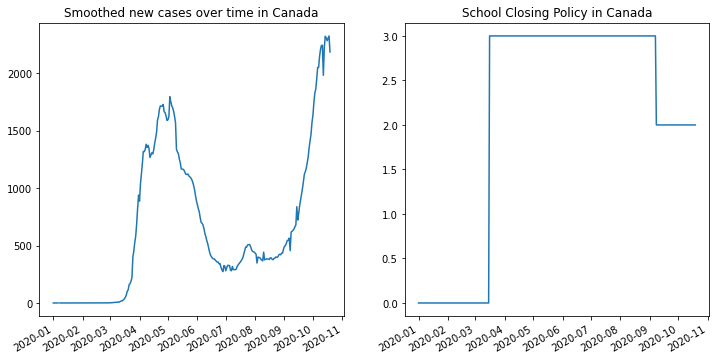

In [54]:
selected_country = "Canada"
data_country = data1[data1.administrative_area_level_1 == selected_country]
data_country.loc[:,'new_cases'] = data_country.loc[:, 'confirmed'].diff()
data_country.loc[:,'new_deaths'] = data_country['deaths'].diff()

# Calculating moving average of new cases
mean = data_country['new_cases']
window = 7
smooth_series = np.convolve(mean, np.ones((window,))/window, mode='valid')
data_country['smooth_new_cases'] = np.append([0,0,0,0,0,0], smooth_series)

# Plotting new cases and school closing policy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(data_country['date'], data_country['smooth_new_cases']);
ax1.set_title("Smoothed new cases over time in Canada")
ax2.plot(data_country['date'], data_country['school_closing']);
ax2.set_title("School Closing Policy in Canada")
fig.autofmt_xdate()

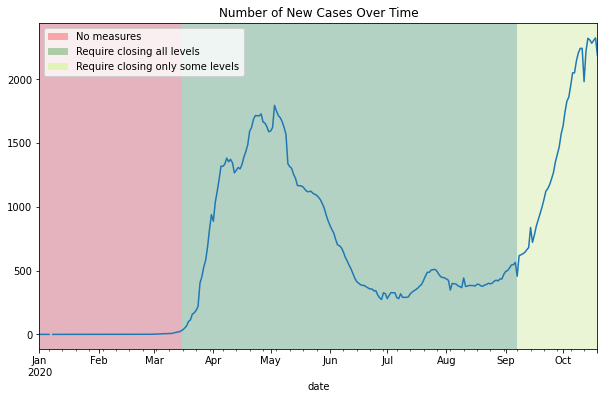

In [41]:
from matplotlib.patches import Patch
ax = data_country.plot(x='date', y='smooth_new_cases',
                       title="Number of New Cases Over Time",
                      figsize=(10,6))
ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),
              data_country['school_closing'].values[np.newaxis],
              cmap='RdYlGn', alpha=0.3)

legend_elements = [Patch(facecolor='red', edgecolor=None, alpha=0.3, label='No measures'),
                  Patch(facecolor='green', edgecolor=None, alpha=0.3, label='Require closing all levels'),
                  Patch(facecolor='greenyellow', edgecolor=None, alpha=0.3, label='Require closing only some levels')]

# Create the figure
#fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper left');

In [55]:
print("Number of cases just before reopening schools: \n" + str(data_country.smooth_new_cases.iloc[-42]))
print("Number of cases 30 days after reopening schools: \n" + str(data_country.smooth_new_cases.iloc[-12]))
print("Ratio: \n" + str(data_country.smooth_new_cases.iloc[-12]/data_country.smooth_new_cases.iloc[-42]))

Number of cases just before reopening schools: 
617.5714285714284
Number of cases 30 days after reopening schools: 
2146.2857142857138
Ratio: 
3.4753643303261623


### Simulation Data

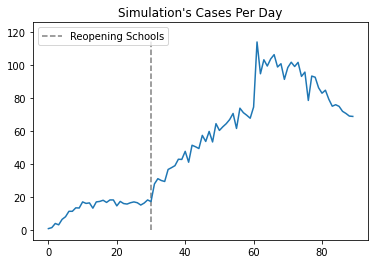

In [63]:
sim_data = [[0, 0, 1, 0, 2, 1, 1, 1, 0, 2], [0, 1, 1, 1, 3, 3, 1, 2, 2, 0], [4, 1, 6, 5, 7, 0, 7, 2, 5, 2], [3, 2, 4, 3, 3, 0, 2, 7, 4, 3], [10, 4, 2, 9, 7, 5, 5, 7, 8, 7], [6, 4, 9, 6, 9, 6, 9, 8, 10, 13], [7, 7, 15, 15, 9, 7, 12, 14, 16, 11], [10, 5, 21, 11, 15, 11, 13, 6, 11, 10], [15, 9, 17, 18, 11, 16, 10, 7, 23, 8], [12, 13, 23, 3, 19, 10, 12, 8, 19, 14], [16, 12, 23, 13, 19, 13, 14, 12, 25, 23], [20, 12, 25, 15, 22, 10, 14, 11, 13, 19], [16, 14, 20, 7, 20, 16, 24, 11, 16, 20], [12, 6, 22, 12, 11, 14, 18, 9, 15, 13], [10, 9, 34, 12, 18, 12, 14, 12, 26, 23], [23, 8, 28, 7, 28, 17, 14, 10, 21, 17], [19, 6, 35, 13, 21, 16, 11, 12, 23, 24], [19, 10, 38, 12, 16, 16, 11, 11, 17, 17], [23, 9, 31, 8, 23, 15, 22, 14, 15, 22], [27, 14, 34, 7, 21, 6, 21, 14, 18, 20], [14, 8, 21, 14, 17, 10, 14, 10, 21, 17], [25, 12, 33, 11, 21, 11, 17, 12, 13, 18], [18, 7, 28, 8, 34, 12, 13, 6, 18, 16], [18, 7, 35, 9, 16, 7, 19, 8, 20, 18], [22, 7, 31, 12, 17, 11, 16, 9, 17, 23], [20, 6, 32, 7, 21, 14, 15, 8, 25, 22], [17, 4, 46, 5, 19, 12, 19, 8, 16, 19], [18, 7, 37, 7, 16, 9, 18, 3, 18, 18], [19, 7, 30, 3, 22, 8, 25, 11, 18, 20], [16, 10, 36, 8, 28, 9, 28, 9, 23, 15], [13, 9, 47, 2, 25, 14, 20, 9, 11, 22], [46, 12, 62, 8, 33, 17, 26, 17, 27, 31], [40, 9, 72, 11, 38, 23, 35, 19, 24, 40], [41, 9, 67, 10, 38, 22, 34, 18, 24, 37], [26, 2, 66, 14, 39, 21, 23, 26, 25, 52], [52, 10, 77, 16, 35, 26, 35, 27, 25, 64], [42, 11, 89, 16, 48, 33, 37, 31, 23, 48], [42, 18, 83, 9, 56, 25, 40, 28, 38, 51], [43, 16, 90, 14, 56, 19, 56, 28, 39, 68], [54, 15, 97, 14, 52, 29, 44, 27, 31, 65], [54, 10, 112, 12, 66, 33, 53, 27, 41, 69], [57, 13, 88, 17, 60, 26, 36, 31, 31, 52], [82, 8, 97, 18, 67, 32, 61, 39, 37, 73], [72, 10, 115, 11, 63, 37, 60, 21, 38, 78], [64, 12, 88, 18, 69, 33, 70, 38, 36, 66], [86, 7, 130, 15, 75, 36, 65, 38, 51, 71], [75, 14, 112, 18, 76, 29, 45, 39, 48, 81], [77, 15, 104, 18, 83, 35, 71, 47, 50, 98], [72, 13, 95, 19, 82, 27, 61, 35, 48, 82], [83, 18, 137, 19, 95, 38, 78, 44, 51, 82], [82, 20, 113, 16, 70, 33, 76, 56, 44, 94], [86, 11, 126, 17, 85, 31, 67, 49, 61, 93], [97, 13, 133, 12, 77, 37, 70, 42, 54, 110], [91, 11, 146, 21, 79, 43, 69, 39, 63, 108], [82, 21, 133, 24, 95, 51, 88, 52, 55, 106], [95, 16, 119, 17, 79, 21, 78, 38, 76, 77], [101, 13, 131, 16, 97, 44, 88, 58, 74, 117], [83, 12, 138, 18, 90, 47, 92, 50, 77, 105], [94, 16, 124, 24, 93, 35, 84, 54, 69, 103], [103, 16, 121, 18, 77, 44, 78, 40, 79, 102], [120, 9, 126, 22, 95, 40, 93, 52, 84, 105], [155, 30, 166, 39, 125, 81, 135, 123, 85, 202], [140, 17, 129, 23, 129, 65, 109, 97, 88, 151], [142, 27, 155, 27, 129, 70, 123, 107, 101, 152], [130, 19, 146, 17, 121, 78, 144, 89, 100, 151], [148, 25, 163, 27, 111, 81, 140, 99, 102, 142], [142, 17, 170, 30, 130, 73, 131, 99, 113, 159], [153, 26, 124, 32, 123, 65, 141, 82, 104, 139], [134, 24, 111, 30, 122, 77, 137, 80, 119, 175], [131, 20, 116, 28, 102, 69, 115, 99, 91, 143], [137, 18, 122, 34, 131, 58, 140, 92, 119, 135], [146, 25, 122, 33, 116, 73, 154, 109, 113, 127], [140, 24, 101, 35, 146, 68, 124, 104, 123, 127], [125, 40, 127, 38, 114, 75, 136, 109, 107, 146], [127, 32, 99, 24, 109, 77, 125, 99, 115, 125], [135, 31, 111, 32, 124, 80, 137, 82, 114, 112], [111, 19, 78, 46, 74, 69, 89, 82, 111, 107], [127, 29, 105, 33, 98, 87, 105, 112, 115, 123], [120, 27, 95, 50, 100, 80, 123, 103, 124, 105], [117, 35, 85, 42, 94, 92, 104, 102, 101, 91], [108, 33, 76, 41, 109, 64, 111, 85, 116, 87], [110, 28, 84, 35, 88, 75, 116, 96, 122, 94], [93, 38, 79, 41, 91, 80, 92, 73, 122, 84], [81, 28, 54, 36, 92, 72, 91, 99, 117, 81], [92, 31, 65, 43, 86, 84, 96, 95, 110, 58], [82, 35, 53, 51, 65, 73, 98, 98, 115, 80], [84, 30, 65, 45, 57, 79, 93, 82, 106, 79], [91, 30, 52, 46, 82, 80, 89, 59, 100, 78], [74, 35, 46, 30, 73, 92, 92, 78, 112, 59], [75, 36, 43, 44, 67, 90, 88, 85, 98, 63]]
sim_data_mean = np.mean(sim_data, axis=1)
plt.plot(sim_data_mean)
plt.title("Simulation's Cases Per Day")
plt.vlines(x=30, ymin=0, ymax=120, color="black", linestyles="dashed", alpha=0.5, label="Reopening Schools");
plt.legend();

In [59]:
print("Number of cases just before reopening schools: \n" + str(sim_data_mean[30]))
print("Number of cases 30 days after reopening schools: \n" + str(sim_data_mean[60]))
print("Ratio: \n" + str(sim_data_mean[60]/sim_data_mean[30]))

Number of cases just before reopening schools: 
17.2
Number of cases 30 days after reopening schools: 
74.6
Ratio: 
4.337209302325581
